In [12]:
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement
from cassandra.auth import PlainTextAuthProvider

In [13]:
cluster = Cluster(
    port=9042, 
    auth_provider=PlainTextAuthProvider(username='cassandra', password='root'))

In [14]:
session = cluster.connect()

In [15]:
session.set_keyspace("devtest")

In [16]:
rows = session.execute("SELECT * FROM genres")
for row in rows:
    print(row)

Row(id=5, name='IMAX')
Row(id=10, name='Romance')
Row(id=16, name='Film-Noir')
Row(id=13, name='Musical')
Row(id=11, name='Crime')
Row(id=1, name='Documentary')
Row(id=19, name='Thriller')
Row(id=8, name='War')
Row(id=2, name='Adventure')
Row(id=4, name='Children')
Row(id=18, name='(no genres listed)')
Row(id=15, name='Horror')
Row(id=20, name='Western')
Row(id=7, name='Animation')
Row(id=6, name='Mystery')
Row(id=9, name='Drama')
Row(id=14, name='Fantasy')
Row(id=17, name='Comedy')
Row(id=12, name='Action')
Row(id=3, name='Sci-Fi')


In [17]:
rows = session.execute("SELECT * FROM movies LIMIT 6")
for row in rows:
    print(row)

Row(id=4317, count_rat=1074, rat_avg=-0.7462899684906006, title='Love Potion #9 (1992)', tmdbid='26255.0', userids=SortedSet([134, 235, 308, 1191, 1272, 1879, 2025, 2712, 3234, 3882, 4959, 5442, 5751, 6122, 6168, 6299, 6789, 7027, 7184, 7603, 7846, 8027, 8110, 8318, 8419, 8446, 8451, 8778, 9129, 9309, 10319, 10379, 10502, 10780, 10799, 10934, 11051, 11273, 11955, 12013, 12152, 12171, 12190, 12844, 12910, 13179, 13211, 13663, 13682, 13924, 14435, 14702, 14755, 14777, 15041, 15418, 15498, 15643, 16117, 16225, 16423, 16470, 16505, 17241, 17314, 17516, 17939, 17980, 18361, 18519, 18704, 19002, 19063, 19160, 19530, 19596, 19679, 19924, 19948, 20001, 20745, 20869, 20953, 21031, 21195, 21349, 21897, 21984, 22003, 22226, 22233, 23488, 23526, 23710, 23910, 24300, 24395, 24438, 25072, 25199, 25334, 25974, 26872, 26954, 27201, 27352, 27493, 27766, 28177, 28276, 28773, 28838, 29100, 29166, 29197, 29647, 29752, 29770, 29771, 30074, 30141, 31171, 31474, 31609, 31940, 32156, 32559, 32669, 32680, 3272

In [18]:
rows = session.execute("SELECT * FROM users LIMIT 6")
for row in rows:
    print(row)

Row(id=4317, avg_rat=-0.35953056812286377, count_rat=17, mov_rateds=SortedSet([48, 104, 368, 594, 596, 1485, 1517, 2012, 2081, 2115, 2640, 2791, 2918, 3114, 4306, 4886, 8644]))
Row(id=62693, avg_rat=0.440337210893631, count_rat=6, mov_rateds=SortedSet([527, 737, 909, 2346, 3086, 3911]))
Row(id=121478, avg_rat=0.06522680819034576, count_rat=100, mov_rateds=SortedSet([11, 105, 110, 193, 337, 799, 830, 898, 900, 901, 902, 911, 914, 915, 916, 937, 1019, 1032, 1347, 1367, 1587, 1784, 1968, 2018, 2094, 2144, 2145, 2146, 2160, 2231, 2288, 2291, 2329, 2366, 2572, 2706, 2918, 3363, 3396, 3534, 3555, 3863, 3916, 4014, 4235, 4246, 4370, 4718, 4993, 5009, 5010, 5952, 5975, 6022, 6218, 6295, 6493, 6539, 6586, 6942, 6953, 7153, 7169, 7173, 7315, 7458, 8033, 8641, 8810, 8948, 8969, 26178, 26680, 30793, 31694, 33085, 37729, 39715, 40629, 44225, 44815, 45501, 45722, 50601, 51662, 53125, 54190, 55052, 55765, 56949, 58293, 58803, 62718, 64499, 64501, 65585, 69406, 69757, 71670, 71823]))
Row(id=265902, av

In [19]:
# QUERYS 

rows = session.execute("SELECT * FROM movies WHERE id = 35 ALLOW FILTERING")
for row in rows:
  print(row)

Row(id=35, count_rat=1572, rat_avg=-0.029743889346718788, title='Carrington (1995)', tmdbid='47018.0', userids=SortedSet([165, 232, 239, 282, 365, 408, 463, 750, 890, 1128, 1148, 1186, 1191, 1272, 1512, 2109, 2233, 2329, 2503, 2515, 2819, 2954, 3246, 3414, 3437, 3642, 3672, 3678, 4027, 4102, 4215, 4438, 4554, 4796, 5008, 5167, 5598, 5636, 5872, 5957, 6132, 6299, 6501, 6910, 6944, 7256, 7378, 7410, 7488, 7607, 7623, 7733, 7998, 8014, 8038, 8239, 8410, 8573, 9179, 9494, 9496, 9535, 9557, 9631, 9789, 9908, 9936, 10010, 10039, 10649, 10712, 10764, 10972, 11070, 11153, 11449, 11500, 11792, 12145, 12193, 12312, 12474, 12808, 12834, 13067, 13195, 13490, 13776, 14069, 14090, 14320, 14581, 14613, 15565, 15843, 15948, 16066, 16110, 16556, 16612, 16974, 17013, 17129, 17225, 17304, 17391, 17487, 17525, 17606, 17891, 18019, 18382, 18450, 19104, 19117, 19452, 19746, 19767, 19812, 19934, 19965, 20054, 20399, 20767, 20823, 21122, 21212, 21424, 21533, 21817, 21991, 22398, 22611, 22744, 22782, 23160, 23

In [50]:
session.shutdown()

In [1]:
import pandas as pd 

In [2]:
import gc

In [3]:
mov_df = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
mov_df.head(10)

,movieId,title,genres,rating_count,rating_avg,tmdbId,moviesId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0,4 10 14 15 22 25 27 31 32 38 42 43 51 54 55 56...
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0,4 14 39 42 45 46 51 56 59 79 81 90 100 103 114...
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0,8 19 51 81 92 114 117 148 163 183 214 241 265 ...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2989,-0.615092,31357.0,83 252 491 623 822 828 912 1073 1128 1143 1165...
4,5,Father of the Bride Part II (1995),Comedy,15474,-0.424957,11862.0,4 8 54 89 117 147 148 163 173 183 190 241 251 ...
5,6,Heat (1995),Action|Crime|Thriller,28683,0.294242,949.0,4 18 19 39 51 56 67 73 76 81 88 100 101 114 11...
6,7,Sabrina (1995),Comedy|Romance,15301,-0.149197,11860.0,8 92 147 148 158 163 168 174 190 196 239 282 3...
7,8,Tom and Huck (1995),Adventure|Children,1539,-0.382578,45325.0,83 726 861 1165 1171 1340 1400 1453 1866 2393 ...
8,9,Sudden Death (1995),Action,4449,-0.490378,9091.0,19 59 60 164 173 251 298 435 445 460 569 572 6...
9,10,GoldenEye (1995),Action|Adventure|Thriller,33086,-0.092664,710.0,4 6 18 19 38 39 42 53 60 81 101 108 121 134 14...


In [4]:
mov_df.shape

(53889, 7)

In [5]:
user_rat = pd.read_csv('./data/preprocessed/users_ratings.csv')
user_rat.head(3)

,userId,count_rat,avg_rat,moviesIds
0,1,16,-0.204384,307 481 1091 1257 1449 1590 1591 2134 2478 284...
1,2,15,0.127745,170 849 1186 1235 1244 1296 1663 1962 2108 224...
2,3,11,0.014075,640 828 960 1221 1321 1645 1825 1985 2024 2028...


In [9]:
gc.collect()

0

In [7]:
df_rat = pd.read_csv('./data/ml-latest/ratings.csv')
df_rat.head(3)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471


In [8]:
df_rat.shape

(27753444, 4)

In [7]:
df_rating = pd.read_csv('./data/ml-latest/ratings.csv', usecols=['userId','movieId', 'rating'])
df_rating.head(3)

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5


In [8]:
count_users_by_movie = df_rating.groupby('movieId').size().reset_index(name='user_per_movie')
count_users_by_movie.head(3)

,movieId,user_per_movie
0,1,68469
1,2,27143
2,3,15585


In [9]:
users_id_by_movie = df_rating.groupby('movieId')['userId'].apply(lambda x: ' '.join(x.astype(str))).reset_index(name='moviesId')
users_id_by_movie.head(3)

,movieId,moviesId
0,1,4 10 14 15 22 25 27 31 32 38 42 43 51 54 55 56...
1,2,4 14 39 42 45 46 51 56 59 79 81 90 100 103 114...
2,3,8 19 51 81 92 114 117 148 163 183 214 241 265 ...


In [10]:
gc.collect()

0

In [11]:
mov_df = pd.merge(mov_df, users_id_by_movie, on='movieId', how='left')
mov_df.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId,moviesId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0,4 10 14 15 22 25 27 31 32 38 42 43 51 54 55 56...
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0,4 14 39 42 45 46 51 56 59 79 81 90 100 103 114...
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0,8 19 51 81 92 114 117 148 163 183 214 241 265 ...


In [64]:
mov_df.sort_values(by=['rating_count'], inplace=True)
mov_df.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId,moviesId_x,moviesId_y
0,159684,Point Zero (2015),Drama|Thriller,1,-0.966327,361146.0,250802,250802
6767,186237,Pippin (1981),Comedy,1,-0.028551,43134.0,132218,132218
6768,186235,Snap (2010),Drama,1,0.440337,137677.0,115576,115576


In [11]:
mov_df['rating_count'].mean()

515.0113010076268

In [14]:
gc.collect()

NameError: name 'gc' is not defined

In [14]:
df_sorted = mov_df.sort_values(by=['rating_count'], ascending=True)
df_sorted.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId
40020,159684,Point Zero (2015),Drama|Thriller,1,-0.966327,361146.0
37193,152167,Ho visto le stelle (2003),Comedy,1,-0.966327,61314.0
9512,27818,Just Bea (Bare Bea) (2004),Drama,1,-0.497439,38398.0


In [15]:
df_sorted.tail(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406,0.603483,680.0
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040,0.493401,13.0
315,318,"Shawshank Redemption, The (1994)",Crime|Drama,97999,0.838131,278.0


In [5]:
import seaborn as sns 

In [26]:
mov_df['rating_avg'].max(), mov_df['rating_avg'].min()

(1.378113212220071, -2.8418787933259684)

/home/lmoroco/Documentos/5to/TDS/projects/pruebas/ScalableRecommendSystem/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating_count'>

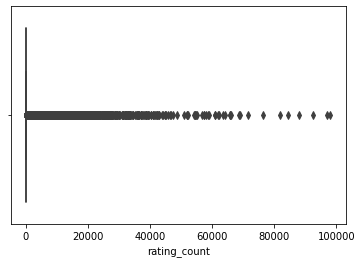

In [23]:
sns.boxplot(mov_df['rating_count'])

In [11]:
import gc
gc.collect()

547

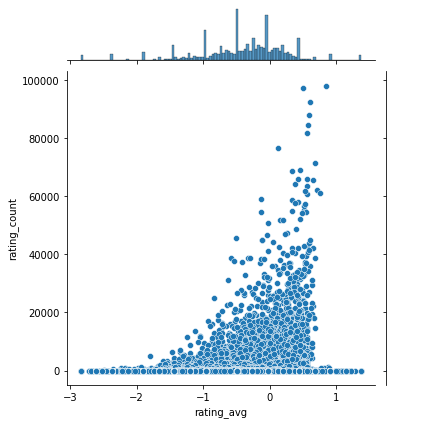

In [24]:
sns.jointplot(x='rating_avg', y='rating_count', data=mov_df)

In [32]:
# users 

usr_rat_df = pd.read_csv('./data/preprocessed/users_ratings.csv', usecols=['userId', 'count_rat', 'avg_rat'])
usr_rat_df.head(4)

,userId,count_rat,avg_rat
0,1,16,-0.204384
1,2,15,0.127745
2,3,11,0.014075
3,4,736,-0.124749


In [35]:
usr_rat_df['count_rat'].max(), usr_rat_df['count_rat'].min()

(23715, 1)

/home/lmoroco/Documentos/5to/TDS/projects/pruebas/ScalableRecommendSystem/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='count_rat'>

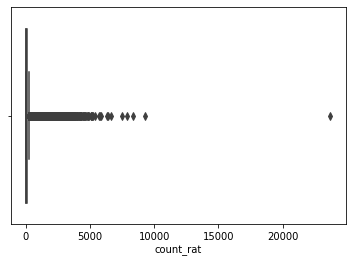

In [34]:
sns.boxplot(sns.jointplot(x='rating_avg', y='rating_count', data=mov_df)['count_rat'])

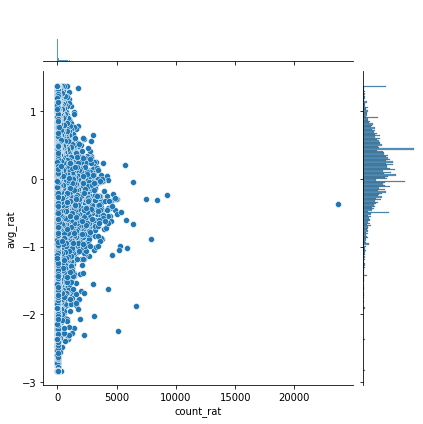

In [37]:
sns.jointplot(x='count_rat', y='avg_rat', data=usr_rat_df)

In [4]:
tags_df = pd.read_csv('./data/ml-latest/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [59]:
tags_df.drop_duplicates(inplace=True)
tags_df.dropna(inplace=True)

In [61]:
tags_df.shape

(1108981, 4)

In [62]:
x = tags_df['tag'].unique()

In [63]:
x.shape

(74714,)

In [64]:
gc.collect()

0

In [66]:
unique_tags = pd.DataFrame(tags_df['tag'].unique(), columns=['etiqueta'])


In [67]:
unique_tags.head(10)

,etiqueta
0,epic
1,Medieval
2,sci-fi
3,space action
4,imdb top 250
5,justice
6,Dinosaurs
7,psychothriller
8,philosophy
9,surveillance


In [68]:
unique_tags.shape

(74714, 1)

In [5]:
tags_per_movie = tags_df.groupby('movieId').size().reset_index(name='tags_by_movie')
tags_per_movie.head()

,movieId,tags_by_movie
0,1,782
1,2,201
2,3,31
3,4,12
4,5,41


In [8]:
tags_per_movie['tags_by_movie'].max(), tags_per_movie['tags_by_movie'].min()

(9478, 1)

<Axes: >

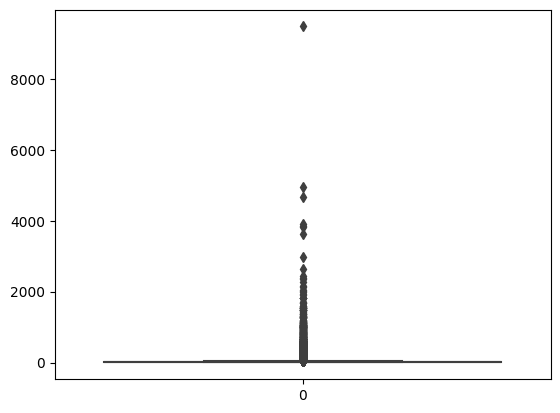

In [10]:
sns.boxplot(tags_per_movie['tags_by_movie'])

In [11]:
tags_per_movie['tags_by_movie'].mean()

24.118592462103912

In [12]:
df = tags_per_movie.sort_values(by=['tags_by_movie'], ascending=True)
df.head()

,movieId,tags_by_movie
35513,157847,1
31922,145212,1
22398,113152,1
28904,135155,1
22393,113132,1


In [13]:
df.tail()

,movieId,tags_by_movie
2716,2959,3864
2343,2571,3915
14819,79132,4670
282,296,4963
248,260,9478


In [23]:
df_mov_cleaned = pd.read_csv('./data/preprocessed/movies_cleaned.csv')

df_mov_cleaned.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [24]:
df_rat = pd.read_csv('./data/ml-latest/tags.csv')
df_rat.head(3)

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410


In [25]:
df_rat.shape

(1108997, 4)

In [26]:
gc.collect()

0

In [31]:
df_tags_clean = tags_per_movie[tags_per_movie['movieId'].isin(df_mov_cleaned['movieId'])]
df_tags_clean.head(3)

,movieId,tags_by_movie
0,1,782
1,2,201
2,3,31


In [32]:
df_tags_clean.shape

(41772, 2)

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
mov_clean = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
mov_clean.head(2)

,movieId,title,genres,rating_count,rating_avg,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0


In [3]:
mov_clean.shape

(53889, 6)

In [4]:
tags_dir = pd.read_csv('./data/ml-latest/tags.csv')
tags_dir.head(2)

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532


In [5]:
tags_dir.shape

(1108997, 4)

In [6]:
count_tags_p_movie = tags_dir.groupby('movieId').size().reset_index(name='count_tags')
count_tags_p_movie.head(3)

,movieId,count_tags
0,1,782
1,2,201
2,3,31


In [7]:
count_tags_p_movie.shape

(45981, 2)

In [8]:
count_tags_p_movie.shape

(45981, 2)

In [9]:
count_tags_p_movie['count_tags'].max(), count_tags_p_movie['count_tags'].min()

(9478, 1)

In [10]:
tags_cleaned = count_tags_p_movie[count_tags_p_movie['movieId'].isin(mov_clean['movieId'])]
tags_cleaned.head(3)

,movieId,count_tags
0,1,782
1,2,201
2,3,31


In [11]:
tags_cleaned.shape

(41772, 2)

<Axes: >

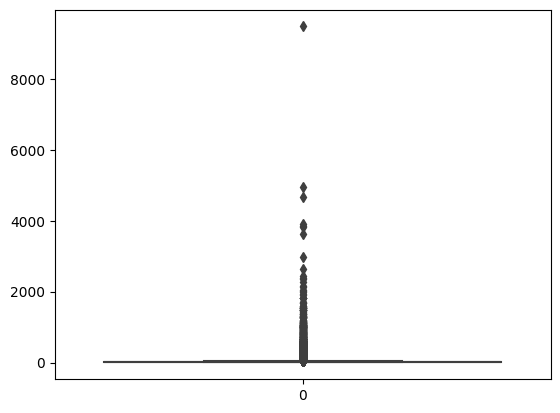

In [12]:
sns.boxplot(tags_cleaned['count_tags'])

In [13]:
tags_cleaned['count_tags'].max(), tags_cleaned['count_tags'].min()

(9478, 1)

In [14]:
tags_cleaned.head(3)

,movieId,count_tags
0,1,782
1,2,201
2,3,31


In [15]:
df_mov = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
df_mov.head()

,movieId,title,genres,rating_count,rating_avg,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2989,-0.615092,31357.0
4,5,Father of the Bride Part II (1995),Comedy,15474,-0.424957,11862.0


In [16]:
df_mov = pd.merge(df_mov, tags_cleaned, on='movieId', how='left')
df_mov.head()

,movieId,title,genres,rating_count,rating_avg,tmdbId,count_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0,782.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0,201.0
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0,31.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2989,-0.615092,31357.0,12.0
4,5,Father of the Bride Part II (1995),Comedy,15474,-0.424957,11862.0,41.0


In [17]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53889 entries, 0 to 53888
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       53889 non-null  int64  
 1   title         53889 non-null  object 
 2   genres        53889 non-null  object 
 3   rating_count  53889 non-null  int64  
 4   rating_avg    53889 non-null  float64
 5   tmdbId        53712 non-null  float64
 6   count_tags    41772 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ MB


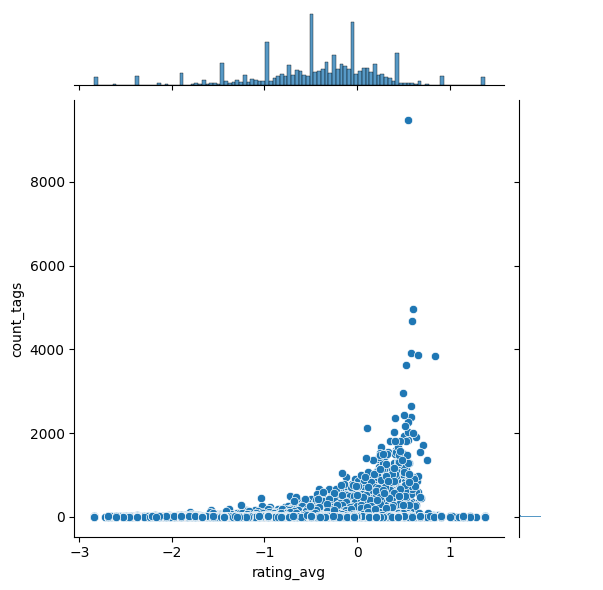

In [18]:
sns.jointplot(x='rating_avg', y='count_tags', data=df_mov)

In [20]:
import matplotlib.pyplot as plt 

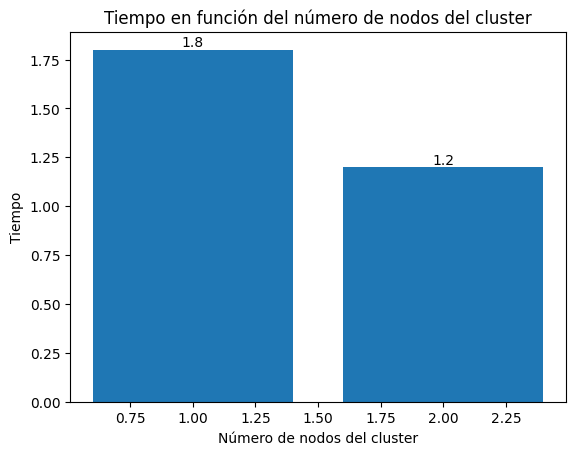

In [21]:
x = [1, 2]
y = [1.8, 1.2]

plt.bar(x, y)

# Agregar anotaciones a cada barra
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

# Etiquetas de los ejes
plt.xlabel('Número de nodos del cluster')
plt.ylabel('Tiempo')

# Título del gráfico
plt.title('Tiempo en función del número de nodos del cluster')

# Mostrar el gráfico
plt.show()

In [2]:
import gc

In [16]:
gc.collect()

0

In [4]:
import pandas as pd
import seaborn as sns

In [12]:
mov_df = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
mov_df.shape

(53889, 7)

In [15]:
mov_df.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId,moviesId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0,4 10 14 15 22 25 27 31 32 38 42 43 51 54 55 56...
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0,4 14 39 42 45 46 51 56 59 79 81 90 100 103 114...
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0,8 19 51 81 92 114 117 148 163 183 214 241 265 ...


In [16]:
x = mov_df['rating_count'].mean()
x

515.0113010076268

In [24]:
mov_filt = mov_df[mov_df['rating_count'] > 0]
mov_filt.shape

(53889, 7)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
bins = [0, 50, 100, 200, float('inf')]
labels = ['0-50', '50-100', '100-200', '200+']

In [29]:
mov_df['rating_range'] = pd.cut(mov_df['rating_count'], bins=bins, labels=labels, right=False)

In [30]:
count_by_range = mov_df['rating_range'].value_counts().sort_index()

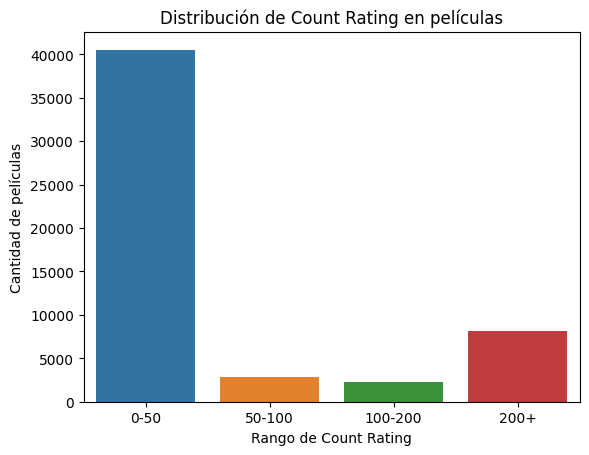

In [31]:
sns.barplot(x=count_by_range.index, y=count_by_range.values)
plt.xlabel('Rango de Count Rating')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de Count Rating en películas')
plt.show()

In [5]:
rat_df = pd.read_csv('./data/ml-latest/ratings.csv')
rat_df.head(3)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471


In [15]:
rat_df.shape

(27753444, 4)

In [9]:
mov_df = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
mov_df.shape

(53889, 7)

In [10]:
mov_df_fil = mov_df[mov_df['rating_count'] < 50]
mov_df_fil.shape

(40529, 7)

In [11]:
mov_df.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId,moviesId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0,4 10 14 15 22 25 27 31 32 38 42 43 51 54 55 56...
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0,4 14 39 42 45 46 51 56 59 79 81 90 100 103 114...
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0,8 19 51 81 92 114 117 148 163 183 214 241 265 ...


In [12]:
mov_df.shape

(53889, 7)

In [13]:
list_id_for_ban = mov_df_fil['movieId'].tolist()
rat_df_filtered = rat_df[~rat_df['movieId'].isin(list_id_for_ban)]
rat_df_filtered.head(3)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471


In [14]:
rat_df_filtered.shape

(27430748, 4)